# Hello


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp
import numpy as np
import os

## Average time comparision n = {5, 10, 15, ... 1000}

In [12]:
def create_plot_for_average_time_comparision(file_name):
    if not os.path.isfile(file_name):
        print(f"File '{file_name}' does not exist.")
        return

    plot_data = {}

    with open(file_name, 'r') as file:
        current_algorithm = None
        for line in file:
            line = line.strip()
            if "Algorithm" in line:
                current_algorithm = line
                plot_data[current_algorithm] = []
            else:
                data = [float(value) for value in line.split()]
                if len(data) == 2:
                    plot_data[current_algorithm].append(data)

    plt.figure(figsize=(15, 10))
    for name, data in plot_data.items():
        data = np.array(data)
        plt.plot(data[:, 0], data[:, 1], label=name)

    plt.xlabel("Liczba zawodników w turnieju", fontsize=16)
    plt.ylabel("Średni czas wykonania (ns)", fontsize=16)
    plt.legend(fontsize=15)
    plt.title('Porównanie średniego czasu działania algorytmów w zależności od liczby zawodników w turnieju.', fontsize=16, fontweight='bold')
    plt.grid(True)
    
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.yscale("log")

    plt.savefig(".\\images\\algorithm-average-time-comparison_plot.png", dpi=300)
    plt.show()


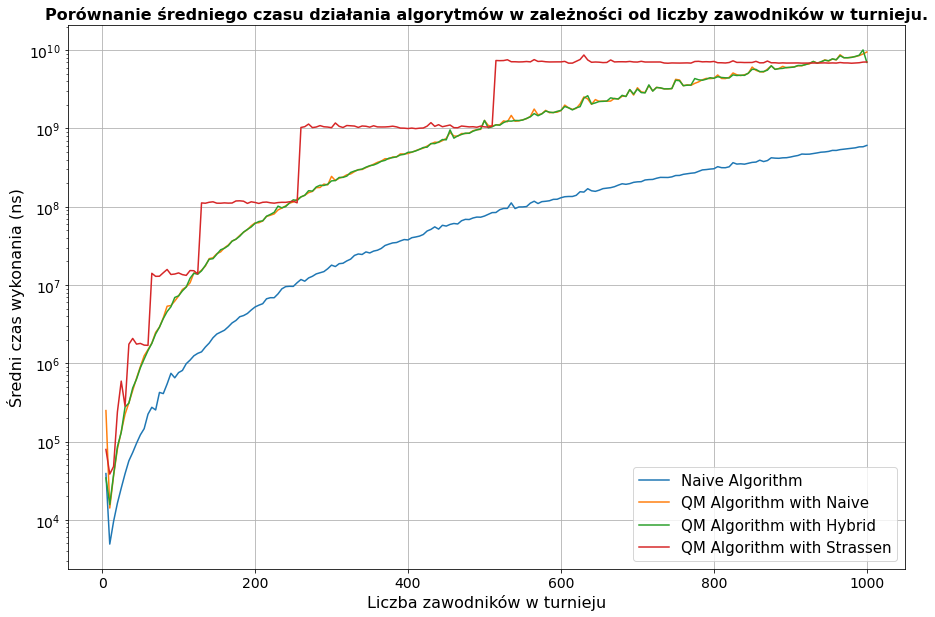

In [13]:
create_plot_for_average_time_comparision("..\\test-results\\algorithm-average-time-results.txt")

## Naive time comparision

In [15]:
def create_plot_for_naive_matrix_comparison(file_name):
    if not os.path.isfile(file_name):
        print(f"File '{file_name}' does not exist.")
        return

    plot_data = {}

    with open(file_name, 'r') as file:
        current_matrix = None
        for line in file:
            line = line.strip()
            if "Matrix" in line:
                current_matrix = line
                plot_data[current_matrix] = []
            else:
                data = [float(value) for value in line.split()]
                if len(data) == 2:
                    plot_data[current_matrix].append(data)

    plt.figure(figsize=(15, 10))
    for name, data in plot_data.items():
        data = np.array(data)
        plt.plot(data[:, 0], data[:, 1], label=name)

    plt.xlabel("Liczba zawodników w turnieju", fontsize=16)
    plt.ylabel("Czas wykonania (ns)", fontsize=16)
    plt.legend(fontsize=15)
    plt.title('Porównanie czasu działania naiwnego algorytmu w zależności od typu macierzy.', fontsize=16, fontweight='bold')
    plt.grid(True)

    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.yscale("log")

    plt.savefig(".\\images\\naive_matrix_comparison_plot.png", dpi=300)
    plt.show()

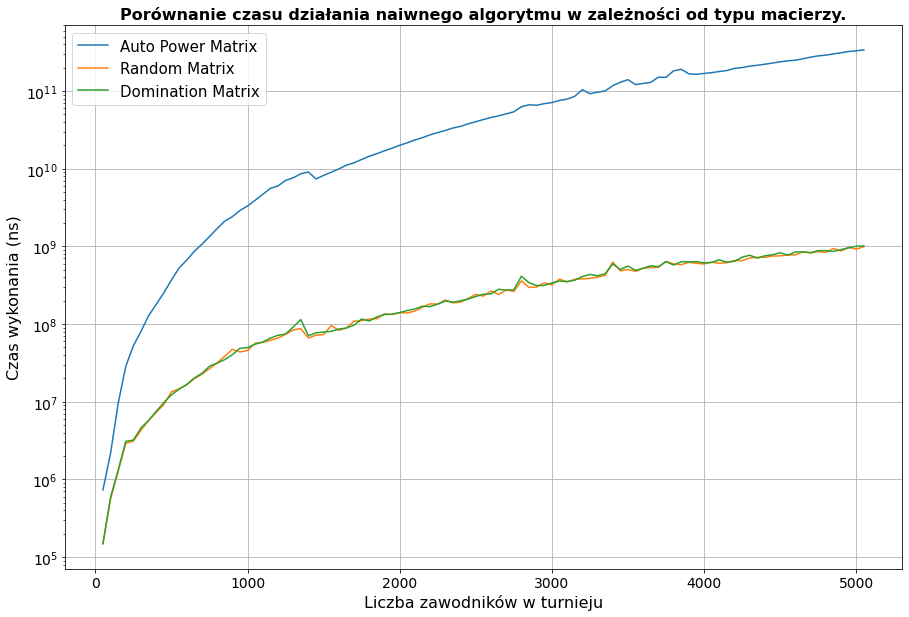

In [16]:
create_plot_for_naive_matrix_comparison("..\\test-results\\naive-time-comparision-results.txt")